In [1]:
import pandas as pd

# URLs de los datasets
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura de archivos
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Añadir columna identificadora de tienda
tienda1["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

# Concatenar los 4 datasets
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Verificar estructura
df.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


Análisis de facturación

In [3]:
df["Total Venta"] = df["Precio"] + df["Costo de envío"]
facturacion = df.groupby("Tienda")["Total Venta"].sum().reset_index()

print("Facturación total por tienda:")
print(facturacion)


Facturación total por tienda:
     Tienda   Total Venta
0  Tienda 1  1.212258e+09
1  Tienda 2  1.175829e+09
2  Tienda 3  1.156536e+09
3  Tienda 4  1.093693e+09


Ventas por categoría

In [4]:
ventas_categoria = df.groupby("Categoría del Producto")["Total Venta"].sum().sort_values(ascending=False).reset_index()

print("Ventas por categoría de producto:")
print(ventas_categoria)

Ventas por categoría de producto:
    Categoría del Producto   Total Venta
0             Electrónicos  1.749039e+09
1        Electrodomésticos  1.395147e+09
2                  Muebles  7.981114e+08
3   Instrumentos musicales  3.672769e+08
4     Deportes y diversión  1.506693e+08
5                 Juguetes  7.762570e+07
6  Artículos para el hogar  6.069090e+07
7                   Libros  3.975600e+07


Calificación promedio de la tienda

In [6]:
calificacion_promedio = df.groupby("Tienda")["Calificación"].mean().reset_index()

print("Calificación promedio por tienda:")
print(calificacion_promedio)

Calificación promedio por tienda:
     Tienda  Calificación
0  Tienda 1      3.976685
1  Tienda 2      4.037304
2  Tienda 3      4.048326
3  Tienda 4      3.995759


Productos más y menos vendidos

In [7]:
productos_mas_vendidos = df["Producto"].value_counts().head(5)
productos_menos_vendidos = df["Producto"].value_counts().tail(5)

print("Top 5 productos más vendidos:")
print(productos_mas_vendidos)

print("\nTop 5 productos menos vendidos:")
print(productos_menos_vendidos)

Top 5 productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Name: count, dtype: int64

Top 5 productos menos vendidos:
Producto
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


Envío promedio por tienda

In [8]:
envio_promedio = df.groupby("Tienda")["Costo de envío"].mean().reset_index()

print("Costo de envío promedio por tienda:")
print(envio_promedio)

Costo de envío promedio por tienda:
     Tienda  Costo de envío
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167


Visualizaciones

In [10]:
# Estilo general
sns.set(style="whitegrid")

/tmp/ipython-input-11-982719499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=facturacion, x="Tienda", y="Total Venta", palette="pastel")


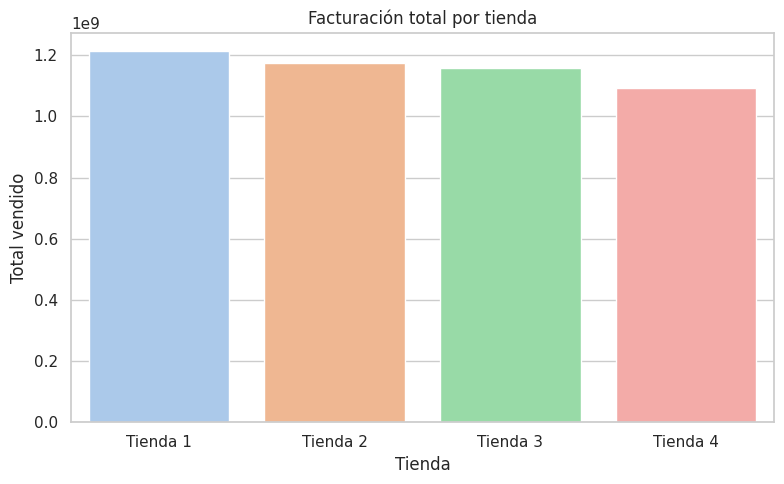

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(data=facturacion, x="Tienda", y="Total Venta", palette="pastel")
plt.title("Facturación total por tienda")
plt.ylabel("Total vendido")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

/tmp/ipython-input-12-3071544766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_categoria, x="Total Venta", y="Categoría del Producto", palette="muted")


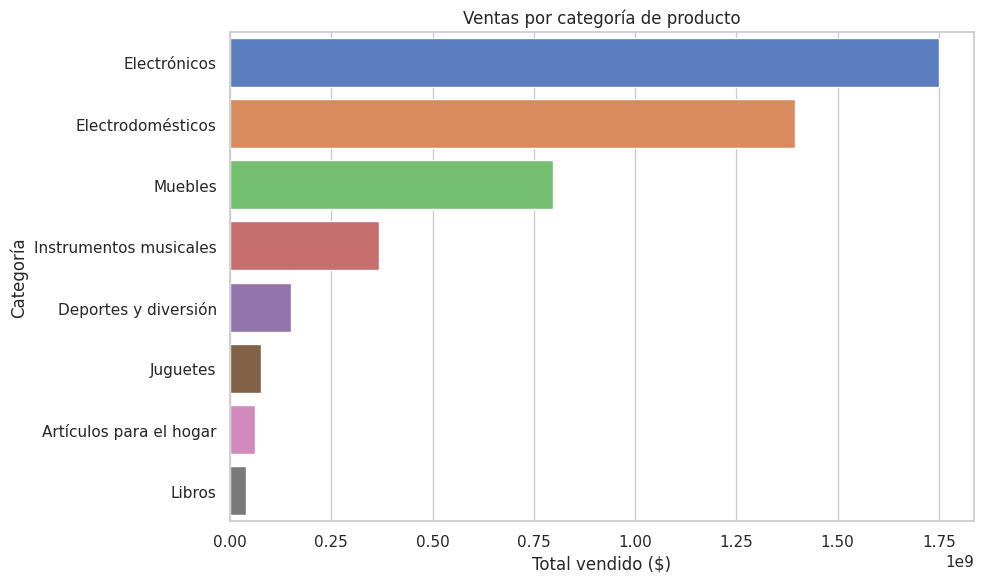

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_categoria, x="Total Venta", y="Categoría del Producto", palette="muted")
plt.title("Ventas por categoría de producto")
plt.xlabel("Total vendido ($)")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()

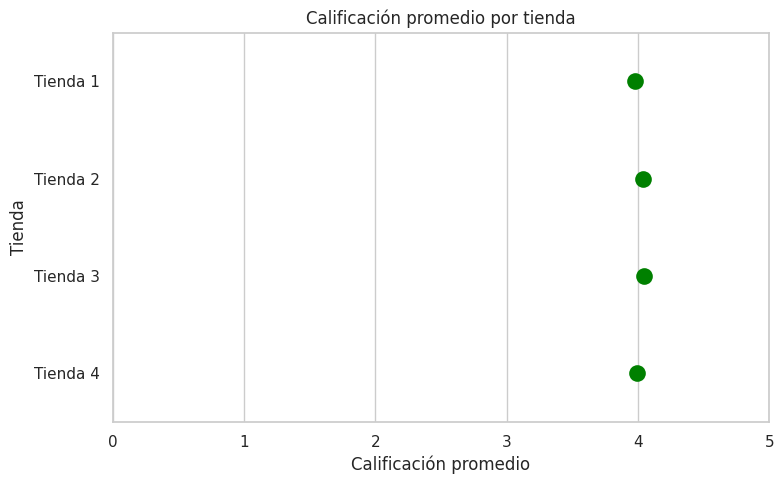

In [13]:
plt.figure(figsize=(8, 5))
sns.stripplot(data=calificacion_promedio, x="Calificación", y="Tienda", size=12, color='green')
plt.title("Calificación promedio por tienda")
plt.xlim(0, 5)
plt.xlabel("Calificación promedio")
plt.ylabel("Tienda")
plt.tight_layout()
plt.show()

Productos más y menos vendidos
-  4.1. Top 5 productos más vendidos → Gráfico de columnas

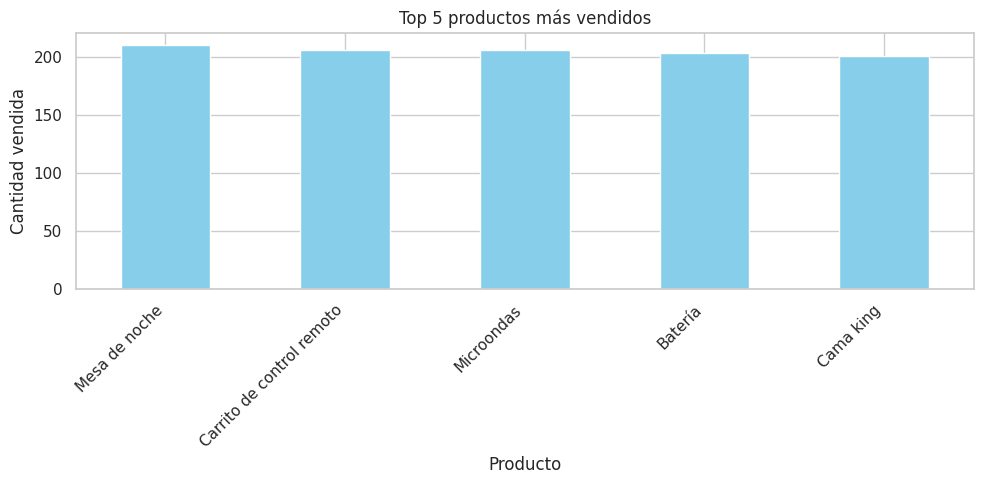

In [14]:
plt.figure(figsize=(10, 5))
productos_mas_vendidos.plot(kind="bar", color="skyblue")
plt.title("Top 5 productos más vendidos")
plt.ylabel("Cantidad vendida")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

- 4.2. Top 5 productos menos vendidos → Gráfico de barras horizontales

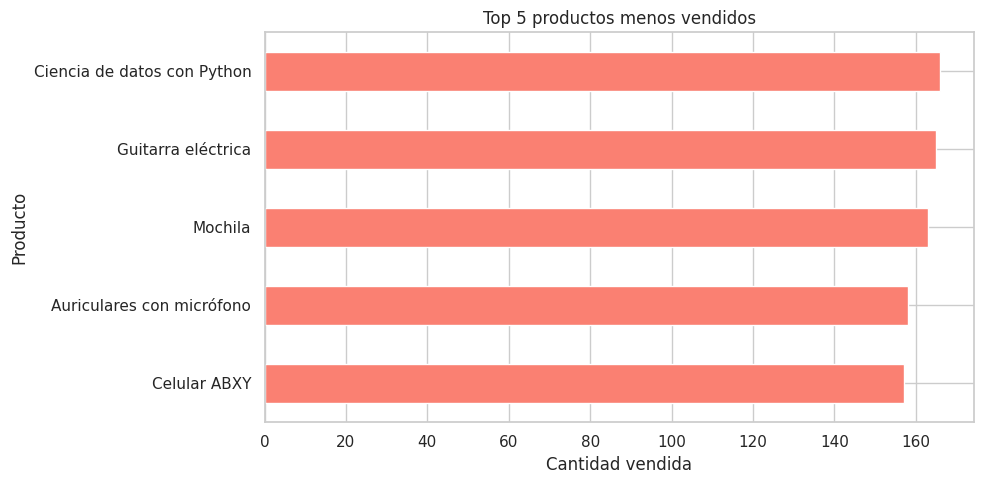

In [15]:
plt.figure(figsize=(10, 5))
productos_menos_vendidos.sort_values().plot(kind="barh", color="salmon")
plt.title("Top 5 productos menos vendidos")
plt.xlabel("Cantidad vendida")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()

Costo de envío promedio por tienda → Gráfico de violín (violinplot)

/tmp/ipython-input-16-2957538183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Tienda", y="Costo de envío", palette="Set3")


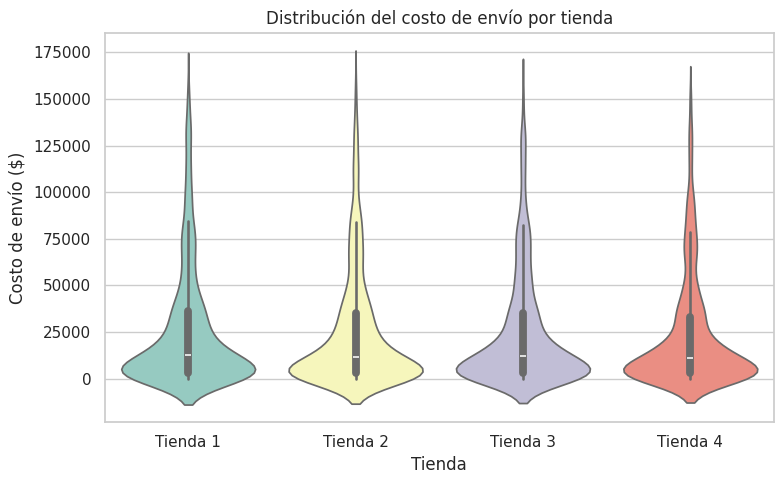

In [16]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="Tienda", y="Costo de envío", palette="Set3")
plt.title("Distribución del costo de envío por tienda")
plt.ylabel("Costo de envío ($)")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()